# This notebook help to create a model to predict if a client buy or not a product 

# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import sys
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import math
import keras
sys.path.append(os.path.realpath('../'))
sys.path.append(os.path.realpath('../../'))
from scripts.create_dataset import genererate_dataframe
from scripts.preprocess_data import Preprocces,modify_state


Using TensorFlow backend.


# Loading data

In [3]:
path = '../../dataset/'

In [4]:
df_train,df_test = genererate_dataframe(path)

[2021-01-20][17:23:11][scripts.create_dataset][INFO] Loading files
[2021-01-20][17:23:12][scripts.create_dataset][INFO] Dataframes generated


In [5]:
df_train.head()

,account_uuid,product,premium,carrier_id,convert,state,industry,subindustry,year_established,annual_revenue,total_payroll,business_structure,num_employees
0,f09e1383-2467-4741-9bd3-39cfd7a2b399,Business_Owners_Policy_BOP,4316.0,29,0,CA,Food and Accommodation,Full-Service Restaurants,2017.0,600000.0,60000.0,Individual,8.0
1,8e686305-a622-4f24-ba0a-478fcbbee32c,Commercial_Auto,2085.0,9,0,GA,Administrative Services and Building Maintenance,Other Services to Buildings and Dwellings,2017.0,38400.0,0.0,Limited Partnership,0.0
2,f13a4b1b-f1fe3-3e49-f60c2-824c38e79a,Business_Owners_Policy_BOP,607.0,60,0,FL,Contractors,Flooring Contractors,2017.0,100000.0,0.0,Limited Liability Company,0.0
3,8f58d58a-762b-40b2-8a9e-6adaa4c31ea5,Workers_Compensation,779.0,22,1,CA,Other Services,Business Associations,2016.0,2500000.0,32000.0,Corporation,1.0
4,76eaf5b0-ed02d-3d49-15cf5-3745425c15,Workers_Compensation,10086.0,29,1,NC,Contractors,Painting and Wall Covering Contractors,2012.0,100000.0,60000.0,Individual,3.0


In [6]:
df_train.tail()

,account_uuid,product,premium,carrier_id,convert,state,industry,subindustry,year_established,annual_revenue,total_payroll,business_structure,num_employees
11719,4c5e3e97-6377-46f8-870c-2aac880ba856,Business_Owners_Policy_BOP,530.0,60,0,AZ,Real Estate,Offices of Real Estate Agents and Brokers,2018.0,50000.0,0.0,Limited Liability Company,0.0
11720,b631c12e-9f15-420e-8b5e-c9385694edbf,General_Liability,485.0,21,1,CA,Wholesale Trade,"Women's, Children's, and Infants' Clothing and...",1997.0,72000.0,0.0,Corporation,0.0
11721,b631c12e-9f15-420e-8b5e-c9385694edbf,General_Liability,550.0,60,0,CA,Wholesale Trade,"Women's, Children's, and Infants' Clothing and...",1997.0,72000.0,0.0,Corporation,0.0
11722,343aa0e9-95f6-4c7f-9fe4-9669d2c7eee8,General_Liability,371.0,39,0,TX,Food and Accommodation,Caterers,2018.0,3600.0,0.0,Individual,0.0
11723,ecd5c103-f3f4-4a2d-8e67-be2d1be4945d,Workers_Compensation,310.5,29,1,MS,Consultants,Administrative Management and General Manageme...,2018.0,55000.0,0.0,Limited Liability Company,1.0


In [7]:
df_test.head()

,account_uuid,product,premium,carrier_id,state,industry,subindustry,year_established,annual_revenue,total_payroll,business_structure,num_employees
0,cadb76f5-2f0ad-a78b-6c138-001288b999,Business_Owners_Policy_BOP,518.0,60,TX,Contractors,Electrical Contractors and Other Wiring Instal...,2018.0,100000.0,25000.0,Limited Liability Company,3.0
1,cadb76f5-2f0ad-a78b-6c138-001288b999,Business_Owners_Policy_BOP,542.0,60,TX,Contractors,Electrical Contractors and Other Wiring Instal...,2018.0,100000.0,25000.0,Limited Liability Company,3.0
2,d8aed557-aa49-4e6c-8f1d-860fa56e633f,General_Liability,500.0,39,FL,Administrative Services and Building Maintenance,Other Services to Buildings and Dwellings,2018.0,25000.0,0.0,Individual,0.0
3,08ec2c90-b3037-3f8e-429af-f834f19937,Business_Owners_Policy_BOP,500.0,31,NY,Administrative Services and Building Maintenance,Janitorial Services,2017.0,10000.0,0.0,Individual,0.0
4,14a4b644-740b-454e-8872-3460fda39092,CW_Professional_Liability,400.0,31,CA,NaN,NaN,2018.0,12000.0,4000.0,Individual,1.0


In [8]:
df_test.tail()

,account_uuid,product,premium,carrier_id,state,industry,subindustry,year_established,annual_revenue,total_payroll,business_structure,num_employees
5000,0ff8953c-71dd-4d0e-83d3-d709edfa6456,CW_Umbrella_Policy,1060.00,73,CA,"Sports, Arts, Entertainment, and Recreation",All Other Amusement and Recreation Industries,2017.0,5000.0,0.0,Individual,0.0
5001,88ffff2d-7520-41ab-97cb-7e77a986781b,CW_Umbrella_Policy,773.00,39,CA,Manufacturing,Jewelry and Silverware Manufacturing,1983.0,160000.0,0.0,Individual,0.0
5002,2b086194-0036-4fcc-b156-6d0da3b733a9,General_Liability,1019.00,9,AL,Other Services,Appliance Repair and Maintenance,2014.0,24000.0,15000.0,Individual,1.0
5003,b889ddea-1ceb-4684-b21b-231ae6c65658,General_Liability,701.00,9,NJ,Contractors,Site Preparation Contractors,2014.0,100000.0,0.0,Limited Liability Company,0.0
5004,43b828ce-ef91-4f4e-b137-bf148f822c52,General_Liability,712.25,39,MI,Administrative Services and Building Maintenance,Janitorial Services,2017.0,20000.0,10000.0,Limited Liability Company,3.0


In [9]:
df_train.columns[1:]

Index(['product', 'premium', 'carrier_id', 'convert', 'state', 'industry',
       'subindustry', 'year_established', 'annual_revenue', 'total_payroll',
       'business_structure', 'num_employees'],
      dtype='object')

In [10]:
df_train.state = df_train['state'].apply(modify_state)

## Cheking same Values in test and train data

In [11]:
for col in ['product','state', 'industry','business_structure']:
    try:
        print()
        print(col)
        print()
        print(set(df_train[col])-set(df_test[col]))
    except:
        pass


product

{'CW_Ocean_Marine', 'Accident_Group', 'CW_BOP_E_O'}

state

set()

industry

{'Rentals and Leasing', 'Home Based Business'}

business_structure

{nan, 'Trust'}


# EDA

In [12]:
df_train.describe()

,premium,carrier_id,convert,year_established,annual_revenue,total_payroll,num_employees
count,11724.000000,11724.000000,11724.000000,11653.000000,1.167400e+04,1.163200e+04,11639.000000
mean,1423.377073,40.507079,0.579751,2013.144083,2.662658e+05,4.301648e+04,7.562162
std,2734.863925,15.116433,0.493620,22.488829,2.135401e+06,2.332703e+05,471.997579
min,1.000000,1.000000,0.000000,6.000000,0.000000e+00,0.000000e+00,0.000000
25%,500.000000,31.000000,0.000000,2013.000000,3.000000e+04,0.000000e+00,0.000000
50%,617.000000,39.000000,1.000000,2017.000000,6.500000e+04,0.000000e+00,0.000000
75%,1238.097500,56.000000,1.000000,2017.000000,1.500000e+05,3.000000e+04,1.000000
max,75508.000000,77.000000,1.000000,2107.000000,7.500000e+07,7.000000e+06,36000.000000


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11724 entries, 0 to 11723
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   account_uuid        11724 non-null  object 
 1   product             11724 non-null  object 
 2   premium             11724 non-null  float64
 3   carrier_id          11724 non-null  int64  
 4   convert             11724 non-null  int64  
 5   state               11685 non-null  object 
 6   industry            11483 non-null  object 
 7   subindustry         11483 non-null  object 
 8   year_established    11653 non-null  float64
 9   annual_revenue      11674 non-null  float64
 10  total_payroll       11632 non-null  float64
 11  business_structure  11722 non-null  object 
 12  num_employees       11639 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 1.3+ MB


In [14]:
df_train.dtypes

account_uuid           object
product                object
premium               float64
carrier_id              int64
convert                 int64
state                  object
industry               object
subindustry            object
year_established      float64
annual_revenue        float64
total_payroll         float64
business_structure     object
num_employees         float64
dtype: object

In [15]:
df_train.shape

(11724, 13)

## Analysis of Missing Values 

In [16]:
df_train.isna().sum()

account_uuid            0
product                 0
premium                 0
carrier_id              0
convert                 0
state                  39
industry              241
subindustry           241
year_established       71
annual_revenue         50
total_payroll          92
business_structure      2
num_employees          85
dtype: int64

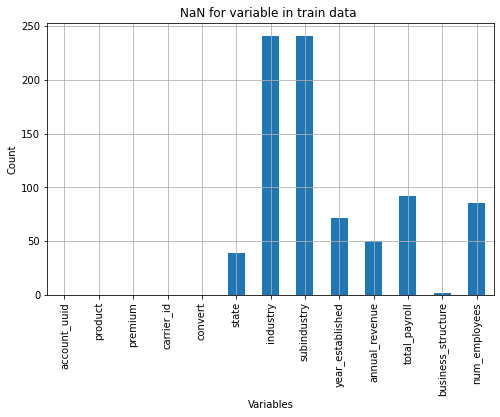

In [17]:
df_nan =pd.DataFrame({'Variables':df_train.isna().sum().index, 'Number_of_nan':df_train.isna().sum().values})
df_nan.plot(x='Variables', y='Number_of_nan', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title('NaN for variable in train data ')
plt.ylabel('Count')
plt.show()

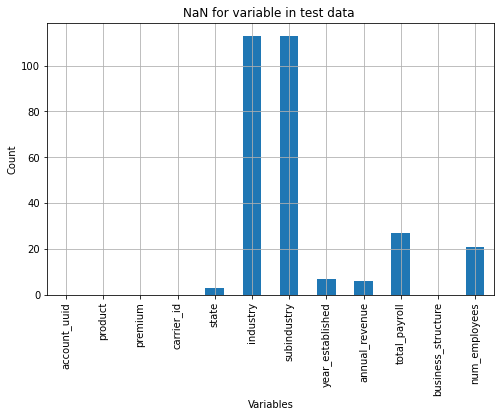

In [18]:
df_test_nan =pd.DataFrame({'Variables':df_test.isna().sum().index, 'Number_of_nan':df_test.isna().sum().values})
df_test_nan.plot(x='Variables', y='Number_of_nan', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title('NaN for variable in test data ')
plt.ylabel('Count')
plt.show()

In [19]:
df_test_nan

,Variables,Number_of_nan
0,account_uuid,0
1,product,0
2,premium,0
3,carrier_id,0
4,state,3
5,industry,113
6,subindustry,113
7,year_established,7
8,annual_revenue,6
9,total_payroll,27


In [20]:
df_test.business_structure.value_counts()

Limited Liability Company    2323
Individual                   1585
Corporation                   906
Non-Profit                     67
Partnership                    56
Limited Partnership            30
Other                          29
Not sure yet                    8
Indivdual/Sole Proprietor       1
Name: business_structure, dtype: int64

## Analysis of target value

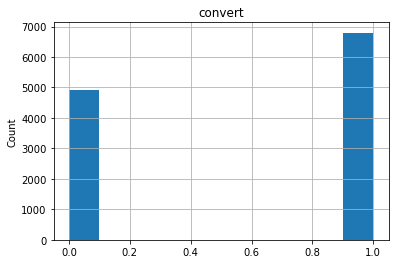

In [21]:
df_train[['convert']].hist()
plt.ylabel('Count')
plt.show()

In [22]:
df_train.convert.value_counts()

1    6797
0    4927
Name: convert, dtype: int64

In [23]:
print(f"Percentage of target 1 : {round(df_train.convert.value_counts().values[0] * 100 / len(df_train))} %" )

Percentage of target 1 : 58 %


In [24]:
print(f"Percentage of target 0 : {round(df_train.convert.value_counts().values[1] * 100 / len(df_train))} %")

Percentage of target 0 : 42 %


## Analysis of Categorical Variables

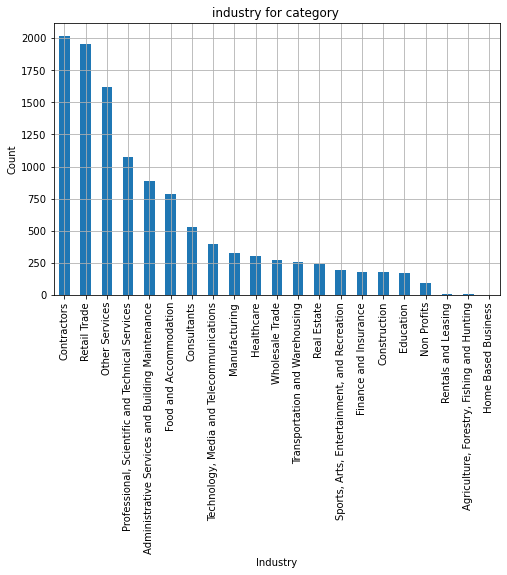

In [25]:
df_industry =pd.DataFrame({'Industry':df_train.industry.value_counts().index, 'Count':df_train.industry.value_counts().values})
df_industry.plot(x='Industry', y='Count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title('industry for category ')
plt.ylabel('Count')
plt.show()

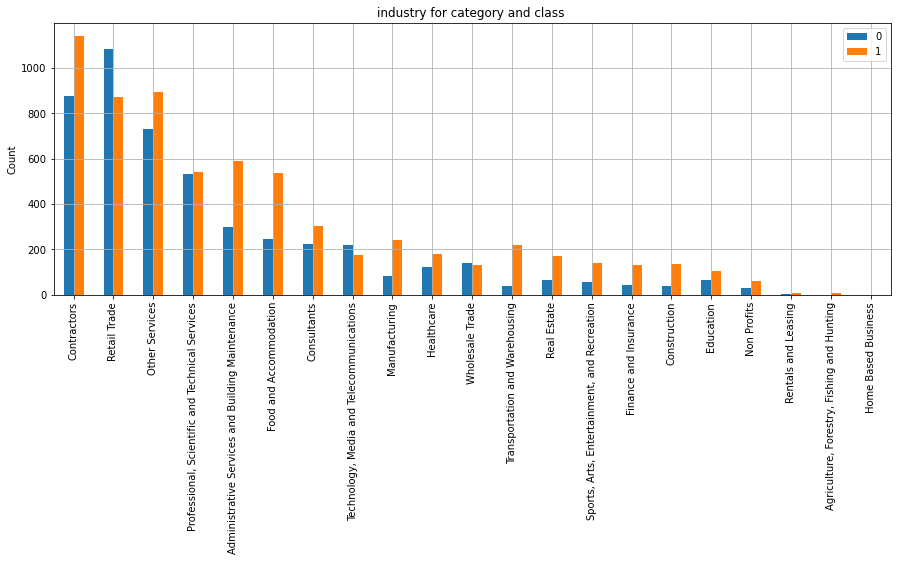

In [26]:
df_industry_category = pd.DataFrame({'0':df_train[df_train['convert']==0][['industry']].industry.value_counts(), '1':df_train[df_train['convert']==1][['industry']].industry.value_counts()},index =df_train.industry.value_counts().index)
df_industry_category.plot.bar(rot=90,grid=True, figsize=(15, 5))
plt.title('industry for category and class ')
plt.ylabel('Count')
plt.show()

In [27]:
df_train = df_train.drop(df_train[(df_train.industry=='Home Based Business')].index)

In [28]:
df_train.subindustry.value_counts()

Janitorial Services                                     708
Residential Remodelers                                  478
Landscaping Services                                    401
Beauty Salons                                           349
Painting and Wall Covering Contractors                  273
                                                       ... 
Human Rights Organizations                                1
Consumer Lending                                          1
Confectionery Manufacturing from Purchased Chocolate      1
Window Treatment Stores                                   1
Tire and Tube Merchant Wholesalers                        1
Name: subindustry, Length: 481, dtype: int64

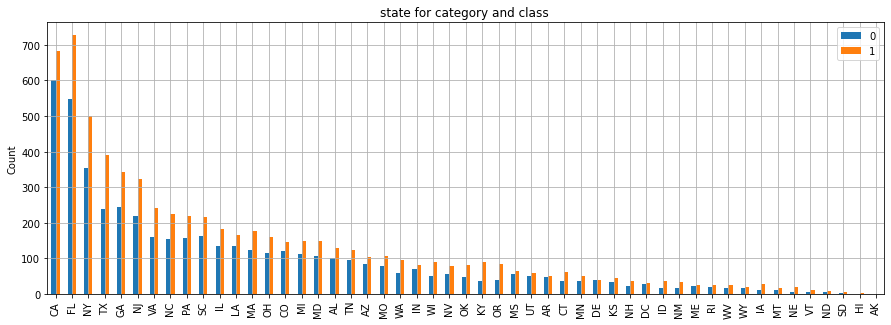

In [29]:
df_state_category = pd.DataFrame({'0':df_train[df_train['convert']==0][['state']].state.value_counts(), '1':df_train[df_train['convert']==1].state.value_counts()},index =df_train.state.value_counts().index)
df_state_category.plot.bar(rot=90,grid=True, figsize=(15, 5))
plt.title('state for category and class ')
plt.ylabel('Count')
plt.show()

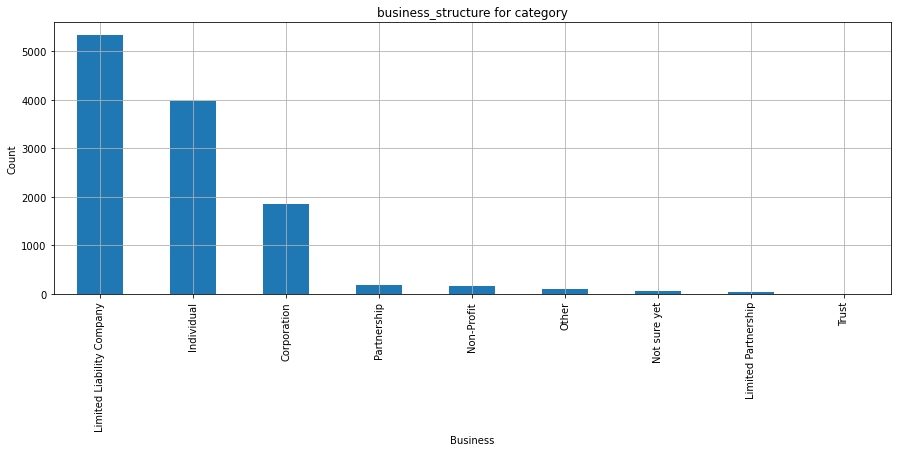

In [30]:
df_business = pd.DataFrame({'Business':df_train.business_structure.value_counts().index, 'Count':df_train.business_structure.value_counts().values})
df_business.plot(x='Business', y='Count', kind='bar', legend=False, grid=True, figsize=(15, 5))
plt.title('business_structure for category')
plt.ylabel('Count')
plt.show()

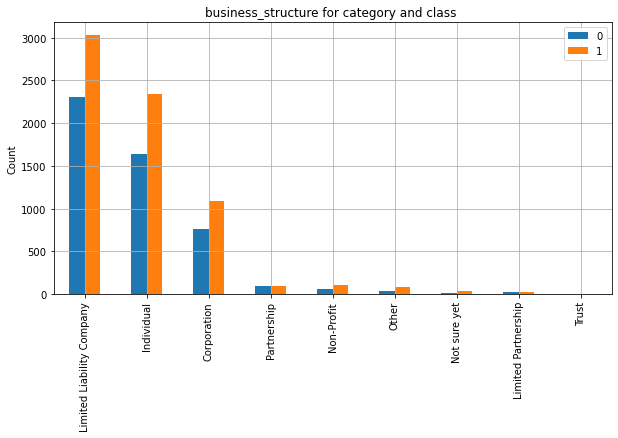

In [31]:
df_business_category = pd.DataFrame({'0':df_train[df_train['convert']==0].business_structure.value_counts(), '1':df_train[df_train['convert']==1].business_structure.value_counts()},index =df_train.business_structure.value_counts().index)
df_business_category.plot.bar(rot=90,grid=True, figsize=(10, 5))
plt.title('business_structure for category and class ')
plt.ylabel('Count')
plt.show()

In [32]:
df_train = df_train.drop(df_train[(df_train.business_structure=='Trust')].index)

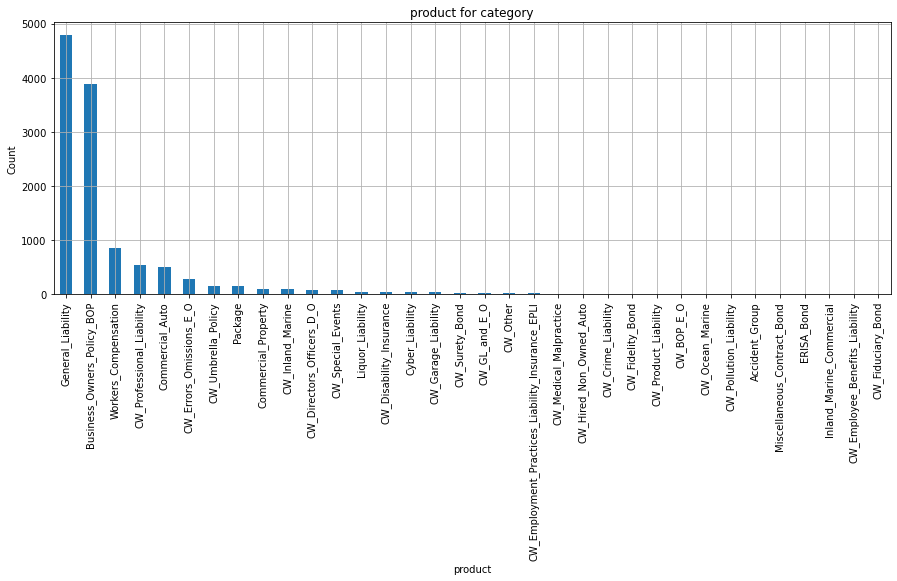

In [33]:
df_product = pd.DataFrame({'product':df_train['product'].value_counts().index, 'Count':df_train['product'].value_counts().values})
df_product.plot(x='product', y='Count', kind='bar', legend=False, grid=True, figsize=(15, 5))
plt.title('product for category')
plt.ylabel('Count')
plt.show()

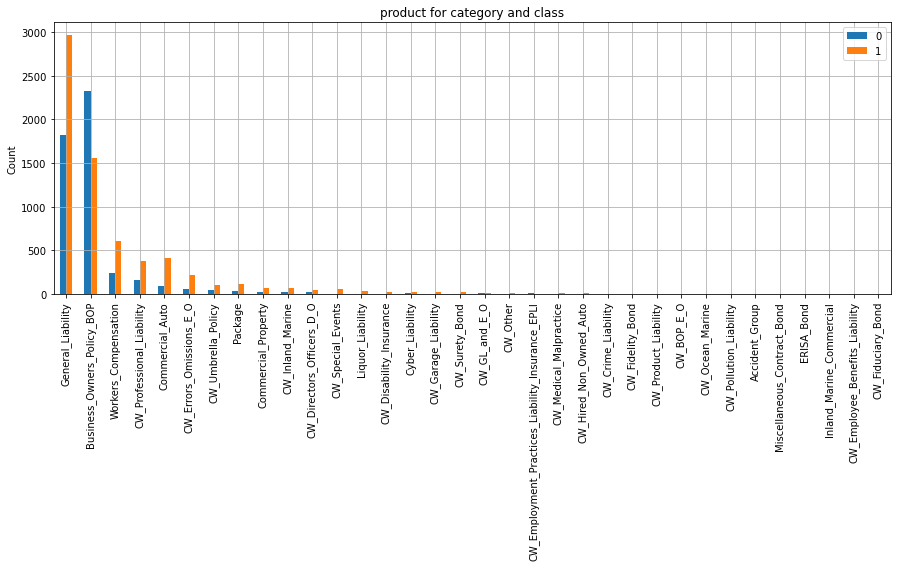

In [34]:
df_product_category = pd.DataFrame({'0':df_train[df_train['convert']==0]['product'].value_counts(), '1':df_train[df_train['convert']==1]['product'].value_counts()},index =df_train['product'].value_counts().index)
df_product_category.plot.bar(rot=90,grid=True, figsize=(15, 5))
plt.title('product for category and class')
plt.ylabel('Count')
plt.show()

In [35]:
df_train = df_train.drop(df_train[(df_train['product']=='Accident_Group') | (df_train['product']=='CW_Ocean_Marine') | (df_train['product']=='CW_BOP_E_O') ].index)

In [36]:
for col in ['product','state', 'industry','business_structure']:
    try:
        print()
        print(col)
        print()
        print(set(df_train[col])-set(df_test[col]))
    except:
        pass


product

set()

state

set()

industry

{'Rentals and Leasing'}

business_structure

{nan}


## Analysis of Numerical Variables

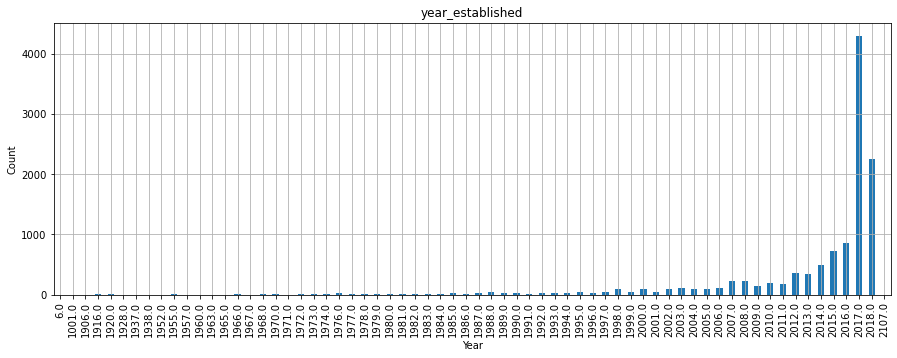

In [37]:
df_year = pd.DataFrame({'Year':df_train.year_established.value_counts().index, 'Number_for_year':df_train.year_established.value_counts().values})
df_year.sort_values(by=['Year']).plot(x='Year', y='Number_for_year', kind='bar', legend=False, grid=True, figsize=(15, 5))
plt.title('year_established')
plt.ylabel('Count')
plt.show()

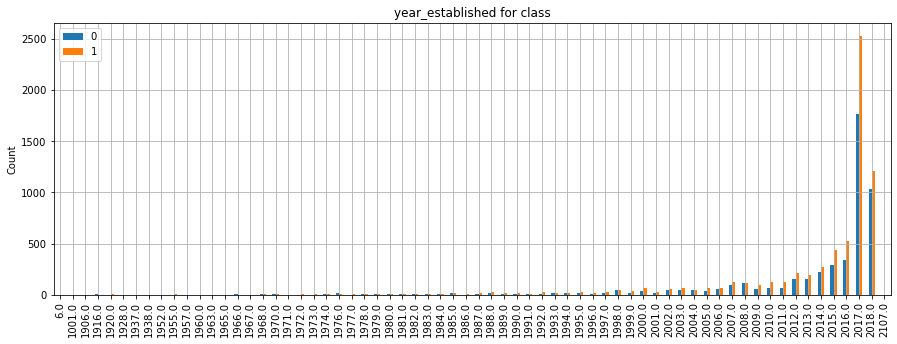

In [38]:
df_year_category = pd.DataFrame({'0':df_train[df_train['convert']==0].year_established.value_counts(), '1':df_train[df_train['convert']==1].year_established.value_counts()},index =df_train.year_established.value_counts().index )
df_year_category.sort_index().plot.bar(rot=90,grid=True, figsize=(15, 5))
plt.title('year_established for class')
plt.ylabel('Count')
plt.show()

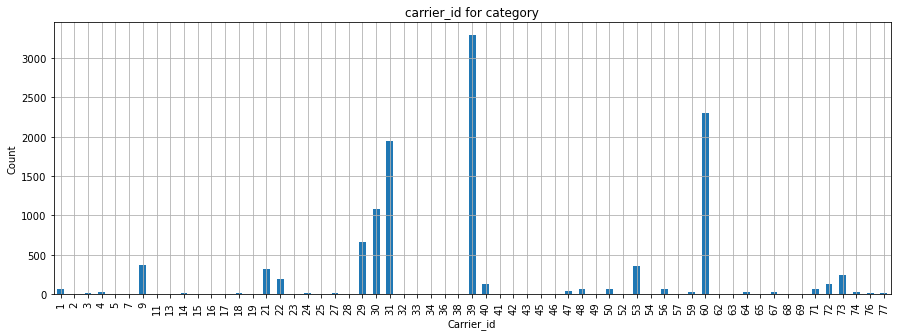

In [39]:
df_carrier = pd.DataFrame({'Carrier_id':df_train.carrier_id.value_counts().index, 'Count':df_train.carrier_id.value_counts().values})
df_carrier.sort_values(by=['Carrier_id']).plot(x='Carrier_id', y='Count', kind='bar', legend=False, grid=True, figsize=(15, 5))
plt.title('carrier_id for category')
plt.ylabel('Count')
plt.show()

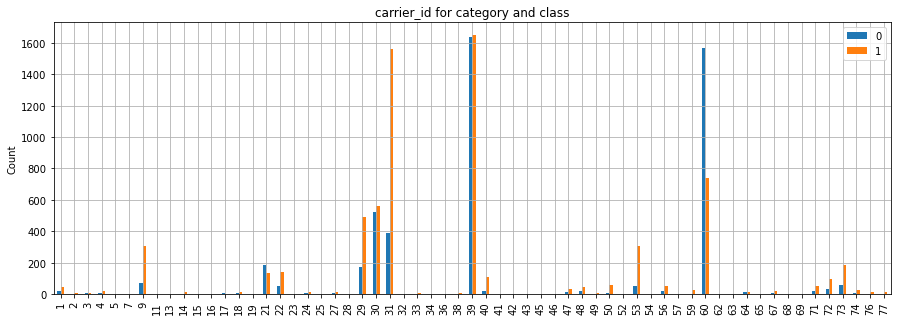

In [40]:
df_carrier_category = pd.DataFrame({'0':df_train[df_train['convert']==0].carrier_id.value_counts(), '1':df_train[df_train['convert']==1].carrier_id.value_counts()},index =df_train.carrier_id.value_counts().index )
df_carrier_category.sort_index().plot.bar(rot=90,grid=True, figsize=(15, 5))
plt.title('carrier_id for category and class')
plt.ylabel('Count')
plt.show()

array([[<AxesSubplot:title={'center':'annual_revenue'}>,
        <AxesSubplot:title={'center':'premium'}>],
       [<AxesSubplot:title={'center':'total_payroll'}>, <AxesSubplot:>]],
      dtype=object)

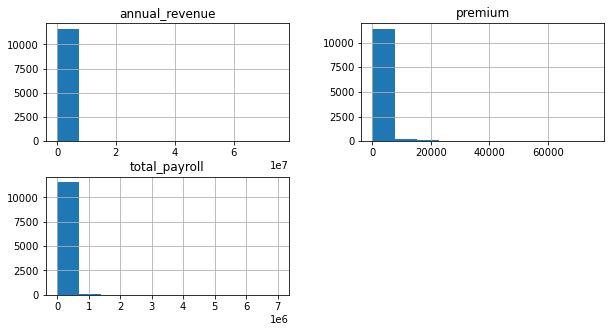

In [41]:
df_train[['annual_revenue','total_payroll','premium']].hist(grid=True, figsize=(10, 5))

## Applying logarithmic smoothing to numerical variables

In [42]:
df_train_log = df_train[['annual_revenue','total_payroll','premium']].applymap(lambda x:np.log(x) if x>0 else x)

In [43]:
df_train_log['convert'] = df_train['convert']

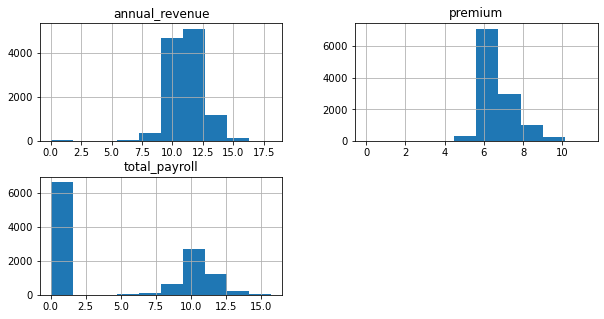

In [44]:
df_train_log[['annual_revenue','total_payroll','premium']].hist(grid=True, figsize=(10, 5))
plt.show()

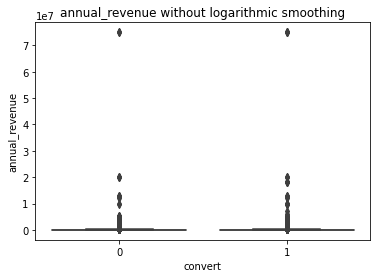

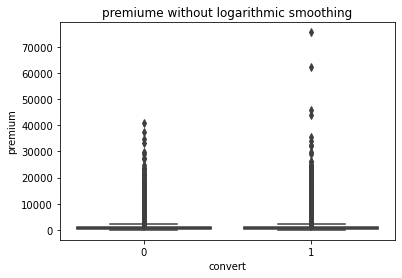

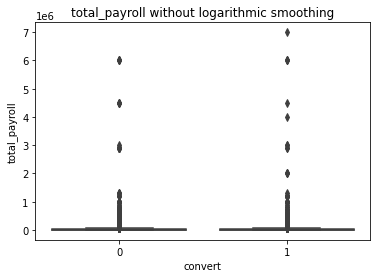

In [45]:
sns.boxplot(x='convert',y='annual_revenue',data=df_train)
plt.title('annual_revenue without logarithmic smoothing')
plt.show()

sns.boxplot(x='convert',y='premium',data=df_train)
plt.title('premiume without logarithmic smoothing')
plt.show()

sns.boxplot(x='convert',y='total_payroll',data=df_train)
plt.title('total_payroll without logarithmic smoothing')
plt.show()

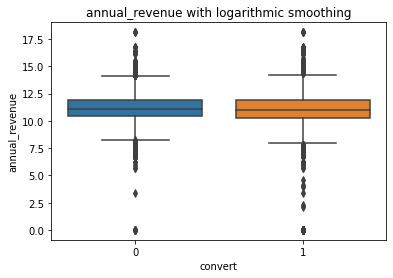

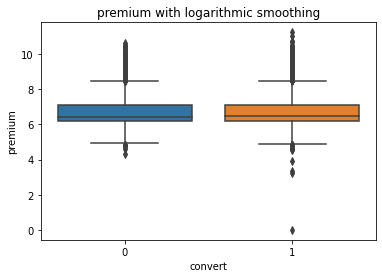

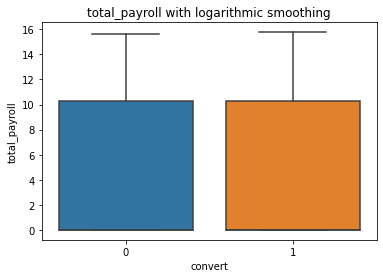

In [46]:
sns.boxplot(x='convert',y='annual_revenue',data=df_train_log)
plt.title('annual_revenue with logarithmic smoothing')
plt.show()

sns.boxplot(x='convert',y='premium',data=df_train_log)
plt.title('premium with logarithmic smoothing')
plt.show()

sns.boxplot(x='convert',y='total_payroll',data=df_train_log)
plt.title('total_payroll with logarithmic smoothing')
plt.show()

## Correlation between variables

In [47]:
df_train_num = df_train.select_dtypes(include = ['float64','int64']).copy()

In [48]:
df_train_num_log = df_train_num.copy()
df_train_num_log[['annual_revenue','total_payroll','premium']] = df_train_num_log[['annual_revenue','total_payroll','premium']].applymap(lambda x:np.log(x) if x>0 else 0)

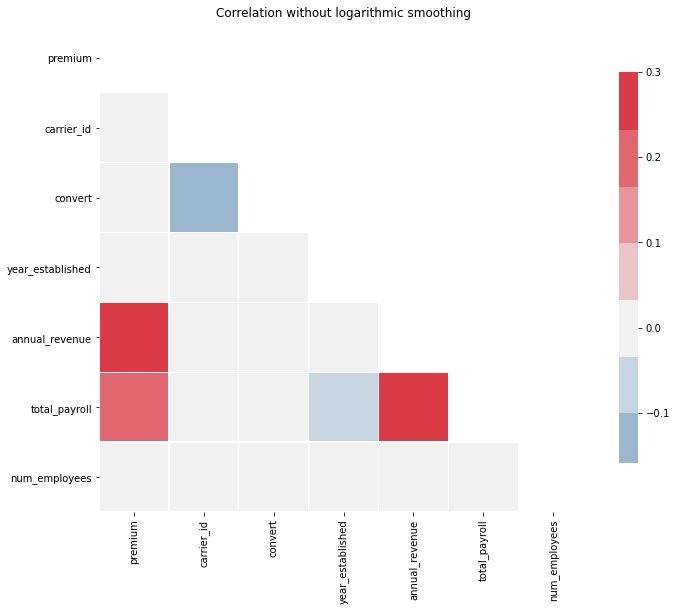

In [49]:
corr =  df_train_num.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(240, 10, n=9)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation without logarithmic smoothing')
plt.show()

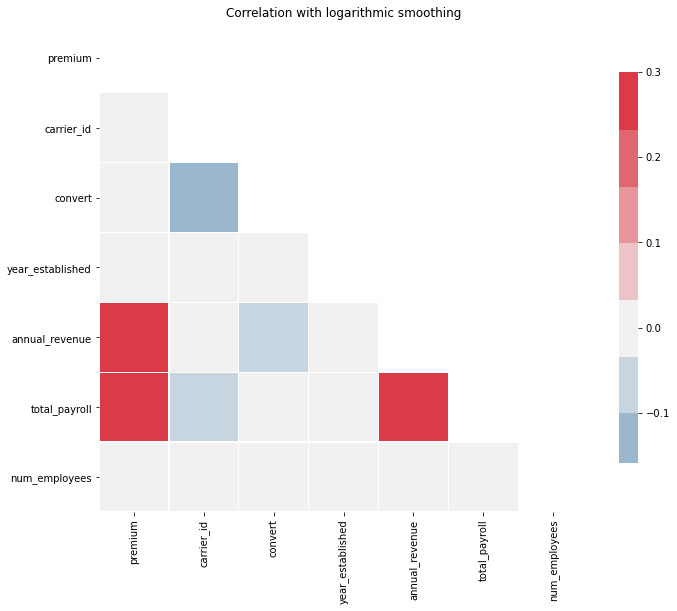

In [50]:
corr =  df_train_num_log.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))


cmap = sns.diverging_palette(240, 10, n=9)


sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation with logarithmic smoothing')
plt.show()

# Preprocess Data 

In [51]:
preprocess = Preprocces(df_train)

In [52]:
df_clean = preprocess.clean_dataframe()

[2021-01-20][17:23:26][scripts.preprocess_data][INFO] Shape of dataframe:(11717, 13)
[2021-01-20][17:23:26][scripts.preprocess_data][INFO] Remove outlier from column year_established
[2021-01-20][17:23:26][scripts.preprocess_data][INFO] Shape of dataframe:(11714, 13)
[2021-01-20][17:23:26][scripts.preprocess_data][INFO] Transform column year_established to company years example: 2017 --> 4
[2021-01-20][17:23:26][scripts.preprocess_data][INFO] Apply logarithm to annual_revenue total_payroll premium


In [53]:
df_clean.head()

,account_uuid,product,premium,carrier_id,convert,state,industry,subindustry,year_established,annual_revenue,total_payroll,business_structure,num_employees
0,f09e1383-2467-4741-9bd3-39cfd7a2b399,Business_Owners_Policy_BOP,8.370084,29,0,CA,Food and Accommodation,Full-Service Restaurants,4.0,13.304685,11.002100,Individual,8.0
1,8e686305-a622-4f24-ba0a-478fcbbee32c,Commercial_Auto,7.642524,9,0,GA,Administrative Services and Building Maintenance,Other Services to Buildings and Dwellings,4.0,10.555813,0.000000,Limited Partnership,0.0
2,f13a4b1b-f1fe3-3e49-f60c2-824c38e79a,Business_Owners_Policy_BOP,6.408529,60,0,FL,Contractors,Flooring Contractors,4.0,11.512925,0.000000,Limited Liability Company,0.0
3,8f58d58a-762b-40b2-8a9e-6adaa4c31ea5,Workers_Compensation,6.658011,22,1,CA,Other Services,Business Associations,5.0,14.731801,10.373491,Corporation,1.0
4,76eaf5b0-ed02d-3d49-15cf5-3745425c15,Workers_Compensation,9.218904,29,1,NC,Contractors,Painting and Wall Covering Contractors,9.0,11.512925,11.002100,Individual,3.0


## 1- Imputation of Missing Values in numerical Data 

In [54]:
df_clean = preprocess.fill_numerical_na(['year_established','annual_revenue','total_payroll','num_employees'],df_clean)

In [55]:
df_clean.isna().sum()

account_uuid            0
product                 0
premium                 0
carrier_id              0
convert                 0
state                  39
industry              240
subindustry           240
year_established        0
annual_revenue          0
total_payroll           0
business_structure      2
num_employees           0
dtype: int64

## 2- Imputation of Missing Values in categorical Data

### 2.1 -Replace NAN for not indicated

In [56]:
df_clean_not = preprocess.fill_categorical_na(['state','industry','subindustry','business_structure'],df_clean)

In [57]:
df_clean_not.isna().sum()

account_uuid          0
product               0
premium               0
carrier_id            0
convert               0
state                 0
industry              0
subindustry           0
year_established      0
annual_revenue        0
total_payroll         0
business_structure    0
num_employees         0
dtype: int64

### 2.2 -Replace NAN with KnnImput

In [58]:
df_clean_knn = preprocess.fill_categorical_na(['state','industry','subindustry','business_structure'],df_clean,knn=True)

In [59]:
df_clean_knn.isna().sum()

account_uuid            0
product                 0
premium                 0
carrier_id              0
convert                 0
state                  39
industry              240
subindustry           240
year_established        0
annual_revenue          0
total_payroll           0
business_structure      2
num_employees           0
state_ordered           0
industry_ordered        0
business_ordered        0
product_ordered         0
dtype: int64

## 3- OneHotEncoder Data

### 3.1 Encoder data for df_clean_not

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
features_to_encode = ['product', 'state', 'industry','business_structure']

In [62]:
X_not = preprocess.encode_and_bind(df_clean_not.drop(['account_uuid','subindustry','convert'],axis=1), features_to_encode)
X_not[X_not<0]=0
Y_not = df_clean_not[['convert']]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_not, Y_not, test_size= 0.2,shuffle=True,random_state =0)

In [64]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9371, 119), (2343, 119), (9371, 1), (2343, 1))

In [65]:
y_train.convert.value_counts()

1    5422
0    3949
Name: convert, dtype: int64

### 3.2 Encoder data for df_clean_knn

In [66]:
X_knn = df_clean_knn[['premium', 'carrier_id','year_established', 'annual_revenue',
       'total_payroll','num_employees', 'state_ordered',
       'industry_ordered', 'business_ordered', 'product_ordered']]
Y_knn = df_clean_knn[['convert']]

In [67]:
X_binarize = X_knn.copy()

In [68]:
X_knn.head()

,premium,carrier_id,year_established,annual_revenue,total_payroll,num_employees,state_ordered,industry_ordered,business_ordered,product_ordered
0,8.370084,29.0,4.0,13.304685,11.002100,8.0,4.0,11.0,4.0,4.0
1,7.642524,9.0,4.0,10.555813,0.000000,0.0,28.0,9.0,1.0,19.0
2,6.408529,60.0,4.0,11.512925,0.000000,0.0,16.0,5.0,2.0,4.0
3,6.658011,22.0,5.0,14.731801,10.373491,1.0,4.0,4.0,3.0,14.0
4,9.218904,29.0,9.0,11.512925,11.002100,3.0,31.0,5.0,4.0,14.0


In [69]:
X_binarize[['state_ordered','industry_ordered', 'business_ordered', 'product_ordered']]= X_binarize[['state_ordered','industry_ordered', 'business_ordered', 'product_ordered']].astype("category")

In [70]:
X_binarize = pd.get_dummies(X_binarize)
X_binarize[X_binarize<0] = 0

In [71]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_binarize, Y_knn, test_size= 0.2,shuffle=True,random_state =0)

In [72]:
X_train_knn.shape, X_test_knn.shape, y_train_knn.shape, y_test_knn.shape

((9371, 139), (2343, 139), (9371, 1), (2343, 1))

In [73]:
y_train_knn.convert.value_counts()

1.0    5422
0.0    3949
Name: convert, dtype: int64

# Train a Model

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score

### Try Difference Clasifier 

In [75]:
clfs = {
    'mnb': MultinomialNB(),
    'gnb': GaussianNB(),
    'mlp1': MLPClassifier(),
    'mlp2': MLPClassifier(activation='logistic', solver='adam', alpha=0.1, hidden_layer_sizes=(100, ), learning_rate= 'adaptive' ,random_state=1, max_iter=300),
    'ada': AdaBoostClassifier(),
    'dtc': DecisionTreeClassifier(),
    'rfc': RandomForestClassifier(),
    'gbc': GradientBoostingClassifier(),
    'lr': LogisticRegression(),
    'xgb': XGBClassifier()
}

### Train with df_clean_not

In [76]:
f1_scores = dict()
for clf_name in clfs:
    print(f'Clasifier : {clf_name}')
    clf = clfs[clf_name]
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1_scores[clf_name] = f1_score(y_pred, y_test)

Clasifier : mnb
Clasifier : gnb
Clasifier : mlp1
Clasifier : mlp2
Clasifier : ada
Clasifier : dtc
Clasifier : rfc
Clasifier : gbc
Clasifier : lr
Clasifier : xgb
[17:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
best_model = max(f1_scores, key=f1_scores.get)
print(f'The best model is {best_model} with f1_score :{f1_scores[best_model]}')

The best model is gbc with f1_score :0.7665726375176306


### Training gbc with some hyperameters

In [78]:
for i in [0.08,0.085,0.1]:
    clf =GradientBoostingClassifier(learning_rate=i)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    proba = clf.predict_proba(X_test)
    print()
    print(f1_score(y_test,pred))
    print(roc_auc_score(y_test,proba[:,1]))


0.7694986072423398
0.752328684960264

0.7642732049036778
0.7520115459589144

0.7665726375176306
0.7527481631429002


In [79]:
clf_not =GradientBoostingClassifier(learning_rate=0.08)
clf_not.fit(X_train, y_train)
pred_not = clf_not.predict(X_test)
print(classification_report(pred_not, y_test))

              precision    recall  f1-score   support

           0       0.59      0.69      0.64       839
           1       0.81      0.73      0.77      1504

    accuracy                           0.72      2343
   macro avg       0.70      0.71      0.70      2343
weighted avg       0.73      0.72      0.72      2343



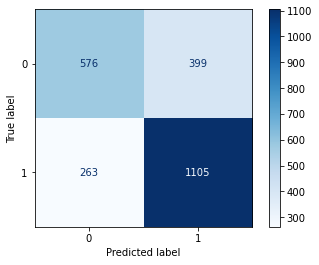

In [80]:
metrics.plot_confusion_matrix(clf_not, X_test, y_test,cmap=plt.cm.Blues)

In [81]:
proba_pred = clf_not.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test,proba_pred[:,1])
auc = roc_auc_score(y_test,proba_pred[:,1])

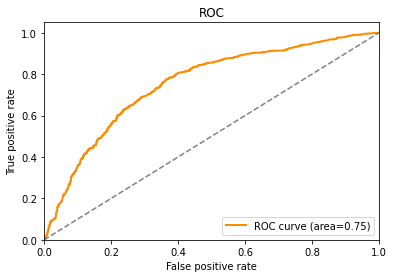

In [82]:
plt.figure()
lw=2
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' %auc)
plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

### Train with df_clean_knn

In [83]:
f1_scores = dict()
for clf_name in clfs:
    print(f'Clasifier : {clf_name}')
    clf = clfs[clf_name]
    clf.fit(X_train_knn, y_train_knn)
    y_pred = clf.predict(X_test_knn)
    f1_scores[clf_name] = f1_score(y_pred, y_test_knn)

Clasifier : mnb
Clasifier : gnb
Clasifier : mlp1
Clasifier : mlp2
Clasifier : ada
Clasifier : dtc
Clasifier : rfc
Clasifier : gbc
Clasifier : lr
Clasifier : xgb
[17:25:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [84]:
best_model = max(f1_scores, key=f1_scores.get)
print(f'The best model is {best_model} with f1_score :{f1_scores[best_model]}')


The best model is gbc with f1_score :0.7636746143057505


### Training gbc with some hyperameters

In [85]:
clf_ =GradientBoostingClassifier(learning_rate=0.08)
clf_.fit(X_train_knn, y_train_knn)
pred_ = clf_.predict(X_test_knn)

print(classification_report(pred_, y_test_knn))

              precision    recall  f1-score   support

         0.0       0.60      0.68      0.63       861
         1.0       0.80      0.73      0.76      1482

    accuracy                           0.71      2343
   macro avg       0.70      0.71      0.70      2343
weighted avg       0.72      0.71      0.72      2343



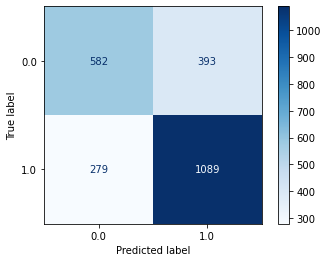

In [86]:
metrics.plot_confusion_matrix(clf_, X_test_knn, y_test_knn,cmap=plt.cm.Blues)

In [87]:
proba_pred_ = clf_.predict_proba(X_test_knn)
fpr_, tpr_, thresh_ = roc_curve(y_test_knn,proba_pred_[:,1])
auc_ = roc_auc_score(y_test_knn,proba_pred_[:,1])

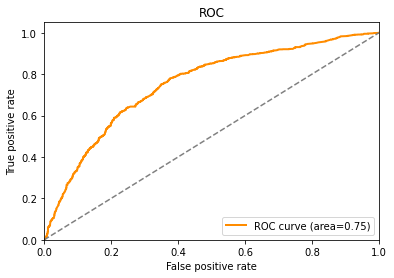

In [88]:
plt.figure()
lw=2
plt.plot(fpr_,tpr_, color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' %auc_)
plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

### Trainign A LSTM with df_clean_not

In [89]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Embedding,Bidirectional
from keras.models import Sequential
from keras import layers
from keras import Input
from keras import Model
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import load_model

In [90]:
X_train_lstm = X_train.to_numpy().reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.to_numpy().reshape(X_test.shape[0], 1, X_test.shape[1])
print(X_train_lstm.shape)

(9371, 1, 119)


In [91]:
data_dim = X_train_lstm.shape[2]
data_dim

119

In [92]:
model_checkpoint_lstm = ModelCheckpoint('../../models/lstm_model.h5', verbose=1, save_best_only=True)

In [93]:
model_lstm = Sequential()
model_lstm.add(LSTM(200, input_shape=(None, data_dim),return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(Bidirectional(LSTM(100,return_sequences=True,activation='sigmoid')))
model_lstm.add(Dropout(0.2))
model_lstm.add(Bidirectional(LSTM(50,activation='sigmoid')))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[2021-01-20][17:25:42][tensorflow][WARNING] From c:\users\lw946lh\appdata\local\continuum\anaconda3\envs\testcw_\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [94]:
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, None, 200)         256000    
_________________________________________________________________
dropout_1 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 200)         240800    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 100)               100400    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [95]:
pat = 5 
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

In [96]:
def fit_and_evaluate_lstm(t_x, val_x, t_y, val_y, EPOCHS=20, BATCH_SIZE=128):
    model = None
    model = model_lstm
    results = model.fit(t_x, t_y, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[early_stopping, model_checkpoint_lstm], 
              verbose=1, validation_split=0.1)  
    print("Val Score: ", model.evaluate(val_x, val_y))
    return results

In [97]:
n_folds=3
epochs=20
batch_size=128

#save the model history in a list after fitting so that we can plot later
model_history_lstm = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(X_train_lstm, y_train, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history_lstm.append(fit_and_evaluate_lstm(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1



[2021-01-20][17:25:47][tensorflow][WARNING] From c:\users\lw946lh\appdata\local\continuum\anaconda3\envs\testcw_\lib\site-packages\keras\backend\tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.



Train on 7589 samples, validate on 844 samples
Epoch 1/20
7589/7589 [==============================] - 4s 547us/step - loss: 0.6948 - accuracy: 0.5524 - val_loss: 0.6643 - val_accuracy: 0.6197

Epoch 00001: val_loss improved from inf to 0.66430, saving model to ../../models/lstm_model.h5
Epoch 2/20
7589/7589 [==============================] - 2s 233us/step - loss: 0.6764 - accuracy: 0.5814 - val_loss: 0.6509 - val_accuracy: 0.6540

Epoch 00002: val_loss improved from 0.66430 to 0.65085, saving model to ../../models/lstm_model.h5
Epoch 3/20
7589/7589 [==============================] - 2s 228us/step - loss: 0.6577 - accuracy: 0.6162 - val_loss: 0.6354 - val_accuracy: 0.6588

Epoch 00003: val_loss improved from 0.65085 to 0.63544, saving model to ../../models/lstm_model.h5
Epoch 4/20
7589/7589 [==============================] - 2s 209us/step - loss: 0.6443 - accuracy: 0.6412 - val_loss: 0.6188 - val_accuracy: 0.6671

Epoch 00004: val_loss improved from 0.63544 to 0.61884, saving model to 

7589/7589 [==============================] - 2s 215us/step - loss: 0.5605 - accuracy: 0.7156 - val_loss: 0.5580 - val_accuracy: 0.7038

Epoch 00007: val_loss did not improve from 0.55086
Epoch 8/20
7589/7589 [==============================] - 2s 206us/step - loss: 0.5606 - accuracy: 0.7138 - val_loss: 0.5613 - val_accuracy: 0.7156

Epoch 00008: val_loss did not improve from 0.55086
Epoch 00008: early stopping
938/938 [==============================] - 0s 162us/step
Val Score:  [0.5801999158442401, 0.700426459312439]




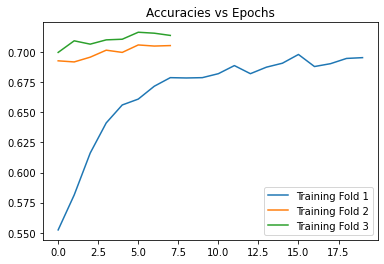

In [98]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history_lstm[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history_lstm[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history_lstm[2].history['accuracy'], label='Training Fold 3')
plt.legend()
plt.show()

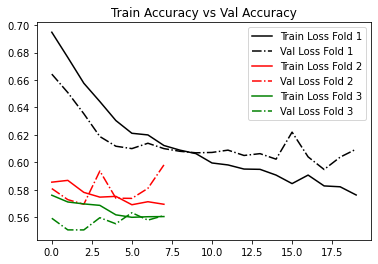

In [99]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history_lstm[0].history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(model_history_lstm[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history_lstm[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(model_history_lstm[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history_lstm[2].history['loss'], label='Train Loss Fold 3', color='green', )
plt.plot(model_history_lstm[2].history['val_loss'], label='Val Loss Fold 3', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

In [100]:
lstm_model = load_model('../../models/lstm_model.h5')

In [101]:
predict_lstm = lstm_model.predict(X_test_lstm)

In [102]:
y_pred_bin = lstm_model.predict_classes(X_test_lstm).flatten().tolist()

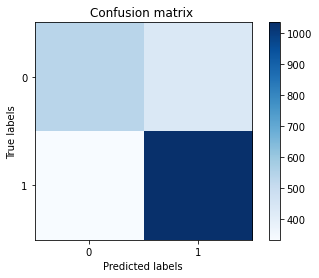

In [103]:
plt.imshow(confusion_matrix(y_test,y_pred_bin), cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(len([0,1])))
plt.yticks(np.arange(len([0,1])))

plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [104]:
print(classification_report(y_test,y_pred_bin))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       975
           1       0.70      0.76      0.73      1368

    accuracy                           0.67      2343
   macro avg       0.66      0.65      0.66      2343
weighted avg       0.67      0.67      0.67      2343



In [105]:
fpr_lstm, tpr_lstm, thresh_lstm = roc_curve(y_test,predict_lstm)
auc_lstm = roc_auc_score(y_test,predict_lstm)


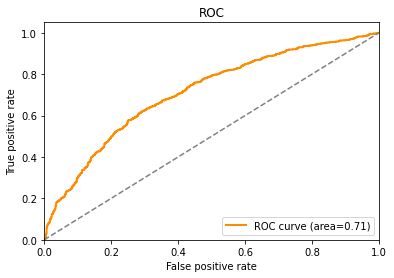

In [106]:
plt.figure()
lw=2
plt.plot(fpr_lstm,tpr_lstm, color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' %auc_lstm)
plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

### Trainign A LSTM with df_clean_knn

In [107]:
X_train_lstm_ = X_train_knn.to_numpy().reshape(X_train_knn.shape[0], 1, X_train_knn.shape[1])
X_test_lstm_ = X_test_knn.to_numpy().reshape(X_test_knn.shape[0], 1, X_test_knn.shape[1])
print(X_train_lstm_.shape)
data_dim = X_train_lstm_.shape[2]
model_checkpoint_lstm = ModelCheckpoint('../../models/lstm_model_.h5', verbose=1, save_best_only=True)
model_lstm = Sequential()
model_lstm.add(LSTM(200, input_shape=(None, data_dim),return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(Bidirectional(LSTM(100,return_sequences=True,activation='sigmoid')))
model_lstm.add(Dropout(0.2))
model_lstm.add(Bidirectional(LSTM(50,activation='sigmoid')))
model_lstm.add(Dropout(0.5))
model_lstm.add(Dense(1, activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])


(9371, 1, 139)


In [108]:
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, None, 200)         272000    
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 200)         240800    
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 200)         0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 100)               100400    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [109]:
pat = 5 
early_stopping = EarlyStopping(monitor='val_loss', patience=pat, verbose=1)

In [110]:
n_folds=3
epochs=20
batch_size=128

#save the model history in a list after fitting so that we can plot later
model_history_lstm = [] 

for i in range(n_folds):
    print("Training on Fold: ",i+1)
    t_x, val_x, t_y, val_y = train_test_split(X_train_lstm_, y_train_knn, test_size=0.1, 
                                               random_state = np.random.randint(1,1000, 1)[0])
    model_history_lstm.append(fit_and_evaluate_lstm(t_x, val_x, t_y, val_y, epochs, batch_size))
    print("======="*12, end="\n\n\n")

Training on Fold:  1
Train on 7589 samples, validate on 844 samples
Epoch 1/20
7589/7589 [==============================] - 3s 448us/step - loss: 0.6925 - accuracy: 0.5557 - val_loss: 0.6714 - val_accuracy: 0.5853

Epoch 00001: val_loss improved from inf to 0.67142, saving model to ../../models/lstm_model_.h5
Epoch 2/20
7589/7589 [==============================] - 1s 194us/step - loss: 0.6712 - accuracy: 0.5887 - val_loss: 0.6639 - val_accuracy: 0.6078

Epoch 00002: val_loss improved from 0.67142 to 0.66388, saving model to ../../models/lstm_model_.h5
Epoch 3/20
7589/7589 [==============================] - 1s 187us/step - loss: 0.6565 - accuracy: 0.6180 - val_loss: 0.6525 - val_accuracy: 0.6398

Epoch 00003: val_loss improved from 0.66388 to 0.65246, saving model to ../../models/lstm_model_.h5
Epoch 4/20
7589/7589 [==============================] - 2s 202us/step - loss: 0.6452 - accuracy: 0.6432 - val_loss: 0.6505 - val_accuracy: 0.6363

Epoch 00004: val_loss improved from 0.65246 to 0


Epoch 00005: val_loss did not improve from 0.56279
Epoch 6/20
7589/7589 [==============================] - 2s 260us/step - loss: 0.5627 - accuracy: 0.7054 - val_loss: 0.5729 - val_accuracy: 0.7073

Epoch 00006: val_loss did not improve from 0.56279
Epoch 00006: early stopping
938/938 [==============================] - 0s 173us/step
Val Score:  [0.5853278804689582, 0.6769722700119019]




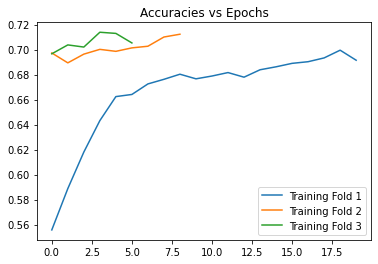

In [111]:
plt.title('Accuracies vs Epochs')
plt.plot(model_history_lstm[0].history['accuracy'], label='Training Fold 1')
plt.plot(model_history_lstm[1].history['accuracy'], label='Training Fold 2')
plt.plot(model_history_lstm[2].history['accuracy'], label='Training Fold 3')
plt.legend()
plt.show()

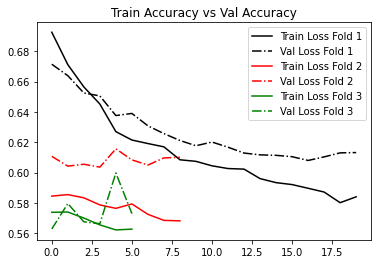

In [112]:
plt.title('Train Accuracy vs Val Accuracy')
plt.plot(model_history_lstm[0].history['loss'], label='Train Loss Fold 1', color='black')
plt.plot(model_history_lstm[0].history['val_loss'], label='Val Loss Fold 1', color='black', linestyle = "dashdot")
plt.plot(model_history_lstm[1].history['loss'], label='Train Loss Fold 2', color='red', )
plt.plot(model_history_lstm[1].history['val_loss'], label='Val Loss Fold 2', color='red', linestyle = "dashdot")
plt.plot(model_history_lstm[2].history['loss'], label='Train Loss Fold 3', color='green', )
plt.plot(model_history_lstm[2].history['val_loss'], label='Val Loss Fold 3', color='green', linestyle = "dashdot")
plt.legend()
plt.show()

In [113]:
lstm_model_ = load_model('../../models/lstm_model_.h5')
predict_lstm_ = lstm_model_.predict(X_test_lstm_)
y_pred_bin_ = lstm_model_.predict_classes(X_test_lstm_).flatten().tolist()
print(metrics.confusion_matrix(y_test_knn,y_pred_bin_))
print()
print(classification_report(y_test_knn,y_pred_bin_))

[[656 319]
 [472 896]]

              precision    recall  f1-score   support

         0.0       0.58      0.67      0.62       975
         1.0       0.74      0.65      0.69      1368

    accuracy                           0.66      2343
   macro avg       0.66      0.66      0.66      2343
weighted avg       0.67      0.66      0.66      2343



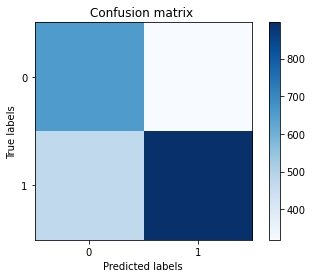

In [114]:
plt.imshow(confusion_matrix(y_test_knn,y_pred_bin_), cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(len([0,1])))
plt.yticks(np.arange(len([0,1])))

plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

In [115]:
fpr_lstm_, tpr_lstm_, thresh_lstm_ = roc_curve(y_test,predict_lstm_)
auc_lstm_ = roc_auc_score(y_test_knn,predict_lstm_)


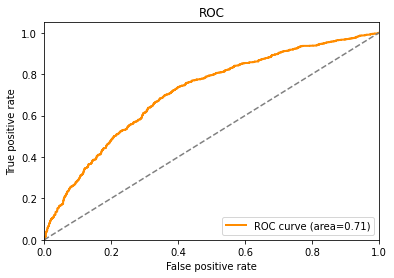

In [116]:
plt.figure()
lw=2
plt.plot(fpr_lstm_,tpr_lstm_, color='darkorange',lw=lw,label='ROC curve (area=%0.2f)' %auc_lstm_)
plt.plot([0,1],[0,1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.show()

# Choosing the best model and data

## With the results obtained, the best model is gbc for the data set in which the missing values were replace for  not indicated in the categorical variables

The model was called clf_not


In [117]:
import pickle

In [118]:
try:
    clf_final = pickle.load(open('../../models/model_gbc.pickle','rb'))
except:
    pickle.dump(clf_not, open('../../models/model_gbc.pickle', 'wb'))

# Making Prediction 

## 1- Prepare Test data

In [119]:
df_test.head()

,account_uuid,product,premium,carrier_id,state,industry,subindustry,year_established,annual_revenue,total_payroll,business_structure,num_employees
0,cadb76f5-2f0ad-a78b-6c138-001288b999,Business_Owners_Policy_BOP,518.0,60,TX,Contractors,Electrical Contractors and Other Wiring Instal...,2018.0,100000.0,25000.0,Limited Liability Company,3.0
1,cadb76f5-2f0ad-a78b-6c138-001288b999,Business_Owners_Policy_BOP,542.0,60,TX,Contractors,Electrical Contractors and Other Wiring Instal...,2018.0,100000.0,25000.0,Limited Liability Company,3.0
2,d8aed557-aa49-4e6c-8f1d-860fa56e633f,General_Liability,500.0,39,FL,Administrative Services and Building Maintenance,Other Services to Buildings and Dwellings,2018.0,25000.0,0.0,Individual,0.0
3,08ec2c90-b3037-3f8e-429af-f834f19937,Business_Owners_Policy_BOP,500.0,31,NY,Administrative Services and Building Maintenance,Janitorial Services,2017.0,10000.0,0.0,Individual,0.0
4,14a4b644-740b-454e-8872-3460fda39092,CW_Professional_Liability,400.0,31,CA,NaN,NaN,2018.0,12000.0,4000.0,Individual,1.0


In [120]:
df_test.tail()

,account_uuid,product,premium,carrier_id,state,industry,subindustry,year_established,annual_revenue,total_payroll,business_structure,num_employees
5000,0ff8953c-71dd-4d0e-83d3-d709edfa6456,CW_Umbrella_Policy,1060.00,73,CA,"Sports, Arts, Entertainment, and Recreation",All Other Amusement and Recreation Industries,2017.0,5000.0,0.0,Individual,0.0
5001,88ffff2d-7520-41ab-97cb-7e77a986781b,CW_Umbrella_Policy,773.00,39,CA,Manufacturing,Jewelry and Silverware Manufacturing,1983.0,160000.0,0.0,Individual,0.0
5002,2b086194-0036-4fcc-b156-6d0da3b733a9,General_Liability,1019.00,9,AL,Other Services,Appliance Repair and Maintenance,2014.0,24000.0,15000.0,Individual,1.0
5003,b889ddea-1ceb-4684-b21b-231ae6c65658,General_Liability,701.00,9,NJ,Contractors,Site Preparation Contractors,2014.0,100000.0,0.0,Limited Liability Company,0.0
5004,43b828ce-ef91-4f4e-b137-bf148f822c52,General_Liability,712.25,39,MI,Administrative Services and Building Maintenance,Janitorial Services,2017.0,20000.0,10000.0,Limited Liability Company,3.0


In [121]:
preprocess_test = Preprocces(df_test)


In [122]:
df_clean_test = preprocess_test.clean_dataframe()



[2021-01-20][17:28:14][scripts.preprocess_data][INFO] Shape of dataframe:(5005, 12)
[2021-01-20][17:28:14][scripts.preprocess_data][INFO] Remove outlier from column year_established
[2021-01-20][17:28:14][scripts.preprocess_data][INFO] Shape of dataframe:(5005, 12)
[2021-01-20][17:28:14][scripts.preprocess_data][INFO] Transform column year_established to company years example: 2017 --> 4
[2021-01-20][17:28:14][scripts.preprocess_data][INFO] Apply logarithm to annual_revenue total_payroll premium


In [123]:
df_clean_test = preprocess_test.fill_numerical_na(['year_established','annual_revenue','total_payroll','num_employees'],df_clean_test)
df_clean_test = preprocess_test.fill_categorical_na(['state','industry','subindustry','business_structure'],df_clean_test)
df_Test = preprocess_test.encode_and_bind(df_clean_test.drop(['account_uuid','subindustry'],axis=1), features_to_encode)
df_Test[df_Test<0]=0

In [124]:
df_clean_test.head()

,account_uuid,product,premium,carrier_id,state,industry,subindustry,year_established,annual_revenue,total_payroll,business_structure,num_employees
0,cadb76f5-2f0ad-a78b-6c138-001288b999,Business_Owners_Policy_BOP,6.249975,60,TX,Contractors,Electrical Contractors and Other Wiring Instal...,3.0,11.512925,10.126631,Limited Liability Company,3.0
1,cadb76f5-2f0ad-a78b-6c138-001288b999,Business_Owners_Policy_BOP,6.295266,60,TX,Contractors,Electrical Contractors and Other Wiring Instal...,3.0,11.512925,10.126631,Limited Liability Company,3.0
2,d8aed557-aa49-4e6c-8f1d-860fa56e633f,General_Liability,6.214608,39,FL,Administrative Services and Building Maintenance,Other Services to Buildings and Dwellings,3.0,10.126631,0.000000,Individual,0.0
3,08ec2c90-b3037-3f8e-429af-f834f19937,Business_Owners_Policy_BOP,6.214608,31,NY,Administrative Services and Building Maintenance,Janitorial Services,4.0,9.210340,0.000000,Individual,0.0
4,14a4b644-740b-454e-8872-3460fda39092,CW_Professional_Liability,5.991465,31,CA,not indicated,not indicated,3.0,9.392662,8.294050,Individual,1.0


In [125]:
df_clean_test.isnull().sum()

account_uuid          0
product               0
premium               0
carrier_id            0
state                 0
industry              0
subindustry           0
year_established      0
annual_revenue        0
total_payroll         0
business_structure    0
num_employees         0
dtype: int64

In [126]:
df_Test.head()

,product_Business_Owners_Policy_BOP,product_CW_Crime_Liability,product_CW_Directors_Officers_D_O,product_CW_Disability_Insurance,product_CW_Employee_Benefits_Liability,product_CW_Employment_Practices_Liability_Insurance_EPLI,product_CW_Errors_Omissions_E_O,product_CW_Fidelity_Bond,product_CW_Fiduciary_Bond,product_CW_GL_and_E_O,...,business_structure_Non-Profit,business_structure_Not sure yet,business_structure_Other,business_structure_Partnership,premium,carrier_id,year_established,annual_revenue,total_payroll,num_employees
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6.249975,60,3.0,11.512925,10.126631,3.0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6.295266,60,3.0,11.512925,10.126631,3.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6.214608,39,3.0,10.126631,0.000000,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,6.214608,31,4.0,9.210340,0.000000,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5.991465,31,3.0,9.392662,8.294050,1.0


In [127]:
result = clf_final.predict(df_Test.to_numpy())

In [128]:
df_test['result'] = result.tolist()

In [129]:
df_test.head()

,account_uuid,product,premium,carrier_id,state,industry,subindustry,year_established,annual_revenue,total_payroll,business_structure,num_employees,result
0,cadb76f5-2f0ad-a78b-6c138-001288b999,Business_Owners_Policy_BOP,518.0,60,TX,Contractors,Electrical Contractors and Other Wiring Instal...,2018.0,100000.0,25000.0,Limited Liability Company,3.0,0
1,cadb76f5-2f0ad-a78b-6c138-001288b999,Business_Owners_Policy_BOP,542.0,60,TX,Contractors,Electrical Contractors and Other Wiring Instal...,2018.0,100000.0,25000.0,Limited Liability Company,3.0,0
2,d8aed557-aa49-4e6c-8f1d-860fa56e633f,General_Liability,500.0,39,FL,Administrative Services and Building Maintenance,Other Services to Buildings and Dwellings,2018.0,25000.0,0.0,Individual,0.0,1
3,08ec2c90-b3037-3f8e-429af-f834f19937,Business_Owners_Policy_BOP,500.0,31,NY,Administrative Services and Building Maintenance,Janitorial Services,2017.0,10000.0,0.0,Individual,0.0,1
4,14a4b644-740b-454e-8872-3460fda39092,CW_Professional_Liability,400.0,31,CA,NaN,NaN,2018.0,12000.0,4000.0,Individual,1.0,1


In [130]:
df_test.result.value_counts()

1    3759
0    1246
Name: result, dtype: int64

In [131]:
df_result = df_test[df_test['result']==1].groupby('account_uuid',as_index=False)['premium'].sum()

In [132]:
df_result.rename(columns={"premium": "account_value"})

,account_uuid,account_value
0,0007250d-1fa22-3ea7-f8d9a-2ab585d136,3220.00
1,000f36a0-70dec-6b10-04a24-d07bcbe4ed,1066.00
2,00143506-a4ba9-6d4d-558b4-28e36e9ee4,9967.08
3,001d5526-eedf-49c9-904a-c4297022c4c5,621.00
4,002d4d12-184f-4e8c-8c79-851ec406c568,516.00
...,...,...
2194,ff3822c4-907ca-0da4-a06db-6deb800602,500.00
2195,ff4b624e-906e6-24e3-a128b-ee25dab4ce,597.00
2196,ff5b8d3e-5842-4495-b7bc-8c20bdac4bf8,5923.00
2197,ff7ba7a6-2d9a-4e26-8344-d2254e2cd747,3284.34


In [133]:
df_result.to_csv('../../results/predict_account_value.csv')